<a href="https://colab.research.google.com/github/maucle/ANNwTF-23-24/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the MNIST dataset using tensorflow_datasets
(ds_train, ds_test), ds_info = tfds.load('mnist', split=['train', 'test'], shuffle_files=True, as_supervised=True, with_info=True)

def preprocess_image(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.reshape(image, (28, 28, 1))
    image = image / 255.0
    label = tf.one_hot(label, 10)
    return image, label

ds_train = ds_train.map(preprocess_image).shuffle(60000).batch(64)
ds_test = ds_test.map(preprocess_image).batch(64)

# Define the neural network model
def create_model():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Define the training loop function
def train_model(num_epochs, model, train_data, test_data, loss_function, optimizer):
    train_loss_history = []
    train_accuracy_history = []
    test_loss_history = []
    test_accuracy_history = []

    for epoch in range(num_epochs):
        # Training
        train_loss = 0
        correct_train_predictions = 0
        total_train_samples = 0

        for images, labels in train_data:
            with tf.GradientTape() as tape:
                predictions = model(images)
                loss = loss_function(labels, predictions)

            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            train_loss += loss.numpy()
            correct_train_predictions += np.sum(np.argmax(predictions.numpy(), axis=1) == np.argmax(labels.numpy(), axis=1))
            total_train_samples += len(labels)

        average_train_loss = train_loss / total_train_samples
        train_accuracy = correct_train_predictions / total_train_samples
        train_loss_history.append(average_train_loss)
        train_accuracy_history.append(train_accuracy)

        # Testing
        test_loss = 0
        correct_test_predictions = 0
        total_test_samples = 0

        for images, labels in test_data:
            predictions = model(images)
            loss = loss_function(labels, predictions)

            test_loss += loss.numpy()
            correct_test_predictions += np.sum(np.argmax(predictions.numpy(), axis=1) == np.argmax(labels.numpy(), axis=1))
            total_test_samples += len(labels)

        average_test_loss = test_loss / total_test_samples
        test_accuracy = correct_test_predictions / total_test_samples
        test_loss_history.append(average_test_loss)
        test_accuracy_history.append(test_accuracy)

        # Print progress
        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Train Loss: {average_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '
              f'Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(test_loss_history, label='Test Loss')
    plt.title('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy_history, label='Train Accuracy')
    plt.plot(test_accuracy_history, label='Test Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.show()

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


Epoch 1/5, Train Loss: 0.0223, Train Accuracy: 0.6796, Test Loss: 0.0120, Test Accuracy: 0.8273
Epoch 2/5, Train Loss: 0.0094, Train Accuracy: 0.8527, Test Loss: 0.0075, Test Accuracy: 0.8791
Epoch 3/5, Train Loss: 0.0069, Train Accuracy: 0.8830, Test Loss: 0.0062, Test Accuracy: 0.8948
Epoch 4/5, Train Loss: 0.0059, Train Accuracy: 0.8956, Test Loss: 0.0055, Test Accuracy: 0.9034
Epoch 5/5, Train Loss: 0.0054, Train Accuracy: 0.9030, Test Loss: 0.0051, Test Accuracy: 0.9083


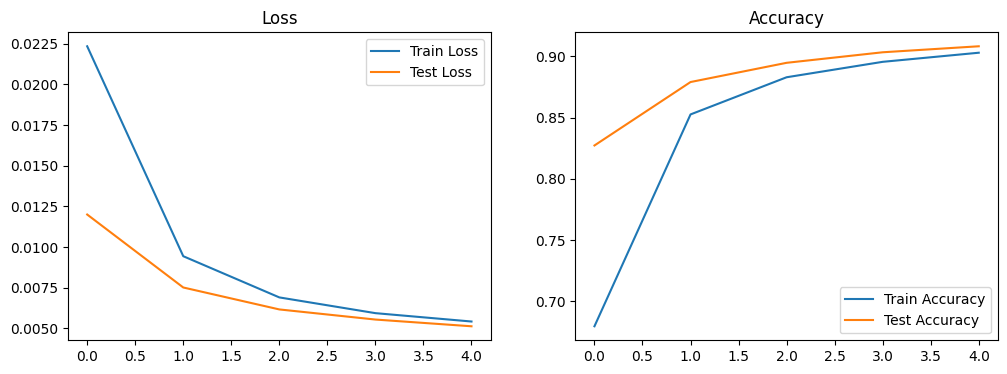

In [2]:
# Create the model, loss function, and optimizer
# ADAM optimizer:
model = create_model()
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()


# Train the model using the defined training loop
train_model(num_epochs=5, model=model, train_data=ds_train, test_data=ds_test, loss_function=loss_function, optimizer=optimizer)

Epoch 1/10, Train Loss: 0.0226, Train Accuracy: 0.6535, Test Loss: 0.0122, Test Accuracy: 0.8221
Epoch 2/10, Train Loss: 0.0096, Train Accuracy: 0.8496, Test Loss: 0.0076, Test Accuracy: 0.8771
Epoch 3/10, Train Loss: 0.0070, Train Accuracy: 0.8824, Test Loss: 0.0061, Test Accuracy: 0.8961
Epoch 4/10, Train Loss: 0.0060, Train Accuracy: 0.8954, Test Loss: 0.0055, Test Accuracy: 0.9049
Epoch 5/10, Train Loss: 0.0055, Train Accuracy: 0.9018, Test Loss: 0.0051, Test Accuracy: 0.9100
Epoch 6/10, Train Loss: 0.0051, Train Accuracy: 0.9071, Test Loss: 0.0049, Test Accuracy: 0.9114
Epoch 7/10, Train Loss: 0.0049, Train Accuracy: 0.9108, Test Loss: 0.0047, Test Accuracy: 0.9121
Epoch 8/10, Train Loss: 0.0047, Train Accuracy: 0.9132, Test Loss: 0.0045, Test Accuracy: 0.9167
Epoch 9/10, Train Loss: 0.0045, Train Accuracy: 0.9164, Test Loss: 0.0044, Test Accuracy: 0.9195
Epoch 10/10, Train Loss: 0.0044, Train Accuracy: 0.9191, Test Loss: 0.0043, Test Accuracy: 0.9224


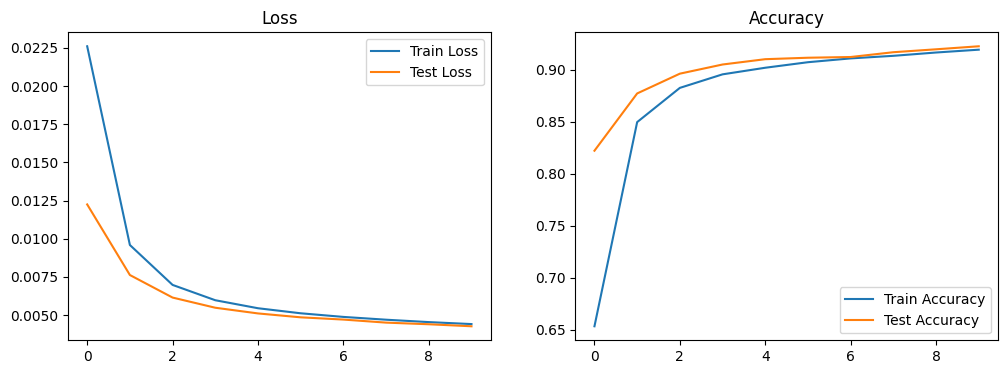

In [3]:
# more epochs:
model = create_model()
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()


# Train the model using the defined training loop
train_model(num_epochs=10, model=model, train_data=ds_train, test_data=ds_test, loss_function=loss_function, optimizer=optimizer)

Epoch 1/10, Train Loss: 0.0360, Train Accuracy: 0.1136, Test Loss: 0.0361, Test Accuracy: 0.1135
Epoch 2/10, Train Loss: 0.0359, Train Accuracy: 0.1154, Test Loss: 0.0361, Test Accuracy: 0.1135
Epoch 3/10, Train Loss: 0.0359, Train Accuracy: 0.1187, Test Loss: 0.0360, Test Accuracy: 0.1135
Epoch 4/10, Train Loss: 0.0358, Train Accuracy: 0.1235, Test Loss: 0.0360, Test Accuracy: 0.1444
Epoch 5/10, Train Loss: 0.0358, Train Accuracy: 0.1328, Test Loss: 0.0359, Test Accuracy: 0.1151
Epoch 6/10, Train Loss: 0.0357, Train Accuracy: 0.1522, Test Loss: 0.0358, Test Accuracy: 0.1165
Epoch 7/10, Train Loss: 0.0356, Train Accuracy: 0.1681, Test Loss: 0.0356, Test Accuracy: 0.3054
Epoch 8/10, Train Loss: 0.0354, Train Accuracy: 0.2070, Test Loss: 0.0354, Test Accuracy: 0.2043
Epoch 9/10, Train Loss: 0.0352, Train Accuracy: 0.2483, Test Loss: 0.0352, Test Accuracy: 0.2794
Epoch 10/10, Train Loss: 0.0349, Train Accuracy: 0.2755, Test Loss: 0.0348, Test Accuracy: 0.3252


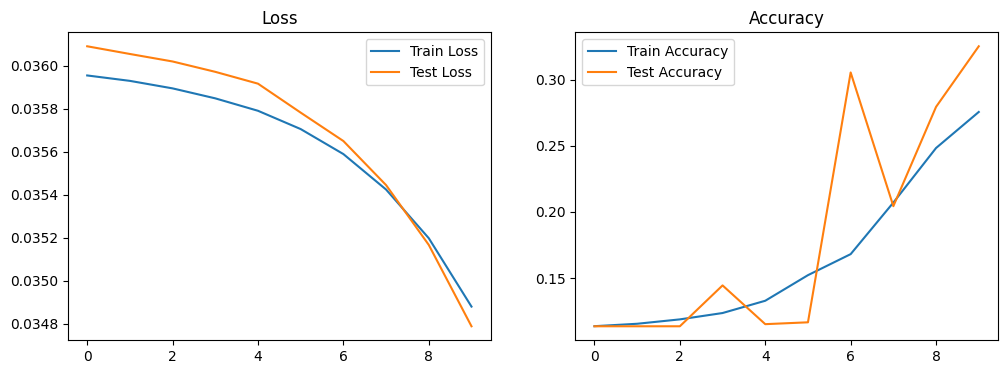

In [7]:
# Create the model, loss function, and optimizer
model = create_model()
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


# Train the model using the defined training loop
train_model(num_epochs=10, model=model, train_data=ds_train, test_data=ds_test, loss_function=loss_function, optimizer=optimizer)

Epoch 1/10, Train Loss: 0.0360, Train Accuracy: 0.1104, Test Loss: 0.0361, Test Accuracy: 0.1135
Epoch 2/10, Train Loss: 0.0360, Train Accuracy: 0.1152, Test Loss: 0.0361, Test Accuracy: 0.1637
Epoch 3/10, Train Loss: 0.0359, Train Accuracy: 0.1279, Test Loss: 0.0359, Test Accuracy: 0.1785
Epoch 4/10, Train Loss: 0.0357, Train Accuracy: 0.1549, Test Loss: 0.0357, Test Accuracy: 0.2009
Epoch 5/10, Train Loss: 0.0352, Train Accuracy: 0.2081, Test Loss: 0.0347, Test Accuracy: 0.1503
Epoch 6/10, Train Loss: 0.0340, Train Accuracy: 0.2450, Test Loss: 0.0334, Test Accuracy: 0.2487
Epoch 7/10, Train Loss: 0.0327, Train Accuracy: 0.2633, Test Loss: 0.0318, Test Accuracy: 0.2229
Epoch 8/10, Train Loss: 0.0320, Train Accuracy: 0.2771, Test Loss: 0.0301, Test Accuracy: 0.3085
Epoch 9/10, Train Loss: 0.0309, Train Accuracy: 0.3033, Test Loss: 0.0288, Test Accuracy: 0.2746
Epoch 10/10, Train Loss: 0.0299, Train Accuracy: 0.3286, Test Loss: 0.0277, Test Accuracy: 0.3628


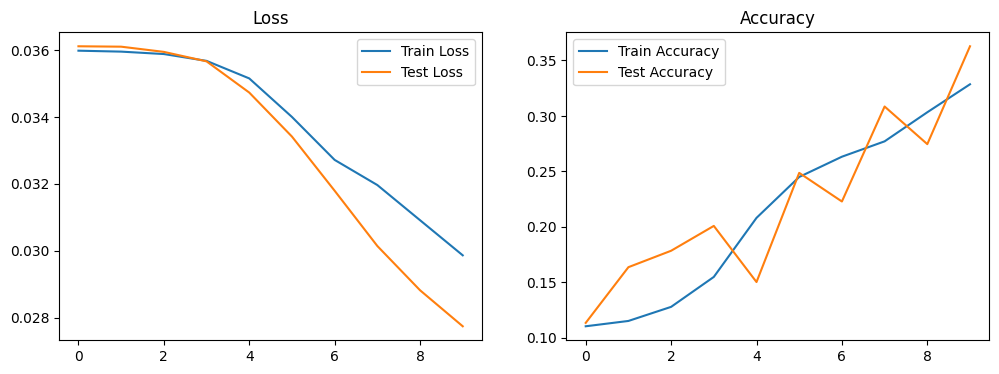

In [8]:
model = create_model()
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.3)


# Train the model using the defined training loop
train_model(num_epochs=10, model=model, train_data=ds_train, test_data=ds_test, loss_function=loss_function, optimizer=optimizer)

Epoch 1/20, Train Loss: 0.0360, Train Accuracy: 0.1141, Test Loss: 0.0361, Test Accuracy: 0.1135
Epoch 2/20, Train Loss: 0.0359, Train Accuracy: 0.1198, Test Loss: 0.0361, Test Accuracy: 0.1135
Epoch 3/20, Train Loss: 0.0359, Train Accuracy: 0.1228, Test Loss: 0.0360, Test Accuracy: 0.1135
Epoch 4/20, Train Loss: 0.0358, Train Accuracy: 0.1249, Test Loss: 0.0360, Test Accuracy: 0.1135
Epoch 5/20, Train Loss: 0.0358, Train Accuracy: 0.1381, Test Loss: 0.0359, Test Accuracy: 0.1138
Epoch 6/20, Train Loss: 0.0357, Train Accuracy: 0.1629, Test Loss: 0.0358, Test Accuracy: 0.1135
Epoch 7/20, Train Loss: 0.0356, Train Accuracy: 0.1898, Test Loss: 0.0356, Test Accuracy: 0.2076
Epoch 8/20, Train Loss: 0.0354, Train Accuracy: 0.2208, Test Loss: 0.0354, Test Accuracy: 0.2465
Epoch 9/20, Train Loss: 0.0351, Train Accuracy: 0.2475, Test Loss: 0.0351, Test Accuracy: 0.2206
Epoch 10/20, Train Loss: 0.0348, Train Accuracy: 0.2724, Test Loss: 0.0347, Test Accuracy: 0.3494
Epoch 11/20, Train Loss: 0.03

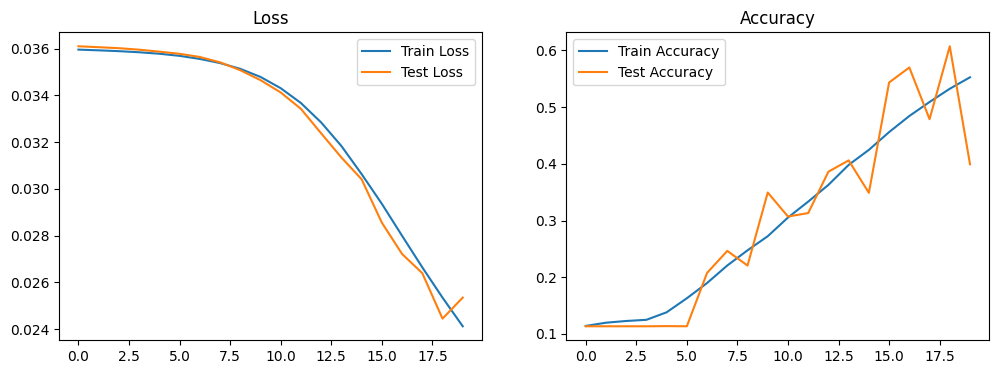

In [9]:
model = create_model()
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


# Train the model using the defined training loop
train_model(num_epochs=20, model=model, train_data=ds_train, test_data=ds_test, loss_function=loss_function, optimizer=optimizer)

In [10]:
# The Adam optimizer seems to work best for this type of problem. SGD needs some more tweaking. It takes much more ierations and increasing the learning rate might not be an optimal solution.